In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow_probability import distributions as tfd

# Load model

In [2]:
model = keras.models.load_model("models/vae-v1")

# Generate images

Creating a image of digits sampled from the latent space such that they slowly morph into each other

In [3]:
def generate_image(x,y):
    z = np.array([[x, y]])
    logits = model.decoder(z)
    return tf.sigmoid(logits).numpy().reshape(28, 28)

In [4]:
# Getting equidistant points from our normal distribution
N = 20

dist = tfd.Normal(0,1)
x_vals = dist.quantile(tf.linspace(0.05,0.95,N))
y_vals = dist.quantile(tf.linspace(0.05,0.95,N))

image = np.zeros((28*N,28*N))

for i,x in enumerate(x_vals):
    for j, y in enumerate(y_vals):
        image[ i*28 : (i+1)*28,
               j*28 : (j+1)*28 ] = generate_image(x, y)

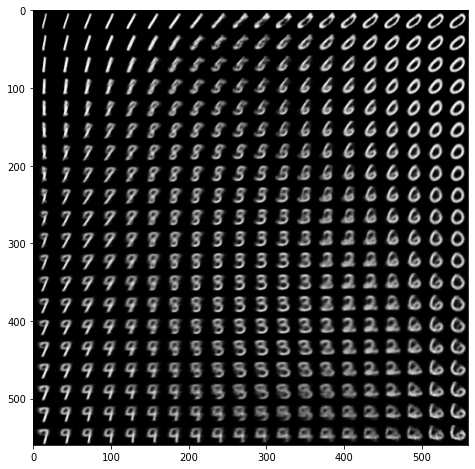

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')

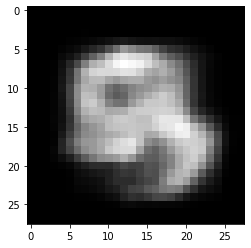

In [6]:
x = dist.sample()
y = dist.sample()
image = generate_image(x, y)
plt.figure(figsize=(4,4))
plt.imshow(image, cmap='gray')